<div style="display: flex; background-color: RGB(255,114,0);" >
<h1 style="margin: auto; padding: 30px; ">DETECTION DE FAUX BILLETS</h1>
</div>

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement du fichier</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.1 - Importation des librairies</h3>
</div>

In [1]:
#Importation de la librairie Pandas
import pandas as pd
#Importation de la librairie datetime
from datetime import datetime, date
#Importation de la librairie numpy
import numpy as np
#Importation de la librairie seaborn
import seaborn as sns
#Importation de la librairie pyplot
import matplotlib.pyplot as plt
#Importation de la librairie de régression linéaire
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
#Importation de la librairie de régression logistique
from sklearn.linear_model import LogisticRegression
#Importation de la librairie Sklearn
import sklearn as sk
from sklearn import cluster
#Importation de la librairie matrice de confusion
from sklearn.metrics import confusion_matrix
#Importation de la librairie de standardisation
from sklearn import preprocessing
#Importation de la librairie de l'Analyse de la composante principale
from sklearn.decomposition import PCA
#Importation de la librairie pickle
import pickle
#Importation des librairies statistiques
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import t, shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.2 - Chargements du fichier</h3>
</div>

In [2]:
#Importation du fichier billets.csv
df_billets = pd.read_csv("billets.csv", sep = ';')

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire du fichier</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1 - Analyse exploratoire du fichier billets.csv</h3>
</div>

In [3]:
df_billets.info() # 37 valeurs manquantes dans la colonne margin_low

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


In [4]:
print(len(df_billets) - len(df_billets.drop_duplicates()), 'doublon') # Aucun doublon

0 doublon


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 - Régression linéaire</h2>
</div>

In [5]:
# Régression linéaire avec Sklearn (Package Machine Learning)
# Ne sera pas mise en oeuvre ici
#df_for_training = df_billets.dropna(axis = 0).reset_index(drop = True)
#X = np.array(df_for_training['length']).reshape(-1, 1)
#y = np.array(df_for_training['margin_low'])

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
#lin_reg = LinearRegression()
#lin_reg.fit(X_train, y_train)

#print("score: {}".format(lin_reg.score(X_test, y_test)))
#print("intercept: {}".format(lin_reg.intercept_))
#print("slope: {}".format(lin_reg.coef_))

#nan = df_billets[df_billets['margin_low'].isnull()]['length'].copy().reset_index()
#x_length = nan['length'].values.reshape(-1, 1)
#y_prediction = lin_reg.predict(x_length)

#df_prediction_margin_low = pd.DataFrame(y_prediction, columns=['prediction'])
#df_prediction = pd.concat([nan, df_prediction_margin_low], axis = 1).set_index('index')
#df_billets_with_linear_regression = df_billets.fillna({'margin_low':df_prediction['prediction']}).copy()

reg_multi = smf.ols('margin_low~is_genuine+diagonal+height_left+height_right+margin_up+length', data=df_billets).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     390.7
Date:                Mon, 14 Oct 2024   Prob (F-statistic):          4.75e-299
Time:                        17:58:07   Log-Likelihood:                -774.14
No. Observations:                1463   AIC:                             1562.
Df Residuals:                    1456   BIC:                             1599.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.8668      8

In [6]:
# On retire length qui a une p-value de 0.868 (le R2 vaut 0.617)
reg_multi = smf.ols('margin_low~is_genuine+diagonal+height_left+height_right+margin_up', data=df_billets).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     469.2
Date:                Mon, 14 Oct 2024   Prob (F-statistic):          2.12e-300
Time:                        17:58:08   Log-Likelihood:                -774.15
No. Observations:                1463   AIC:                             1560.
Df Residuals:                    1457   BIC:                             1592.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.4247      7

In [7]:
# On retire diagonal qui a une p-value de 0.719 (le R2 vaut 0.617)
reg_multi = smf.ols('margin_low~is_genuine+height_left+height_right+margin_up', data=df_billets).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     586.8
Date:                Mon, 14 Oct 2024   Prob (F-statistic):          8.76e-302
Time:                        17:58:08   Log-Likelihood:                -774.21
No. Observations:                1463   AIC:                             1558.
Df Residuals:                    1458   BIC:                             1585.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.3902      5

In [8]:
# On retire height_right qui a une p-value de 0.496 (le R2 vaut 0.617)
reg_multi = smf.ols('margin_low~is_genuine+height_left+margin_up', data=df_billets).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     782.5
Date:                Mon, 14 Oct 2024   Prob (F-statistic):          3.63e-303
Time:                        17:58:08   Log-Likelihood:                -774.45
No. Observations:                1463   AIC:                             1557.
Df Residuals:                    1459   BIC:                             1578.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.9104      4

In [9]:
# On retire height_left qui a une p-valu de 0.454 (le R2 vaut 0.617)
reg_multi = smf.ols('margin_low~is_genuine+margin_up', data=df_billets).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     1174.
Date:                Mon, 14 Oct 2024   Prob (F-statistic):          1.24e-304
Time:                        17:58:08   Log-Likelihood:                -774.73
No. Observations:                1463   AIC:                             1555.
Df Residuals:                    1460   BIC:                             1571.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              5.9263      0

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">3.1 - Test de colinéarité des variables</h3>
</div>

In [10]:
# Test de colinéarité des variables
# Tous les coefficients sont inférieurs à 10, il n'y a donc pas de problème de colinéarité
variables = reg_multi.model.exog
[variance_inflation_factor(variables, i) for i in np.arange(1, variables.shape[1])]

[1.5938854494007757, 1.5938854494007741]

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">3.2 - Test de l’homoscédasticité</h3>
</div>

In [11]:
# Test de l’homoscédasticité
# La p-valeur ici est inférieure à 5%, on rejette l'hypothèse H0 selon laquelle les variances sont constantes
_, pval, __, f_pval = statsmodels.stats.diagnostic.het_breuschpagan(reg_multi.resid, variables)
print('p value test Breusch Pagan:', pval)

p value test Breusch Pagan: 3.2033559115817906e-36


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">3.3 - Test de la normalité des résidus</h3>
</div>

In [12]:
# Test de la normalité des résidus
# Ici, l'hypothèse de normalité est remise en cause (p_valeur inférieure à 5%)
shapiro(reg_multi.resid)

ShapiroResult(statistic=0.9936248064041138, pvalue=6.20942773821298e-06)

In [13]:
# Néanmoins, on valide le modèle car l'échantillon des données prises en compte pour les tests n'est pas de taille suffisante

In [14]:
# Le modèle est bon avec un R2 de 0.617
# On peut donc prédire les valeurs manquantes
nan = df_billets[df_billets['margin_low'].isnull()][['is_genuine', 'margin_up']].copy().reset_index()
y_prediction = reg_multi.predict(nan)

df_prediction_margin_low = pd.DataFrame(y_prediction, columns=['prediction'])
df_prediction = pd.concat([nan, df_prediction_margin_low], axis = 1).set_index('index')
df_billets_with_linear_regression = df_billets.fillna({'margin_low':df_prediction['prediction']}).copy()

In [15]:
df_billets_with_linear_regression.info() # Aucune valeur manquante

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1500 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 4 - Analyse Bivariée</h2>
</div>

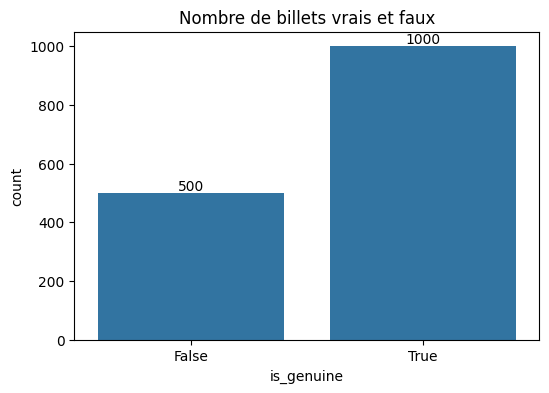

In [16]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(data = df_billets_with_linear_regression, x = 'is_genuine')
ax.bar_label(ax.containers[0])
plt.title('Nombre de billets vrais et faux')
plt.show()

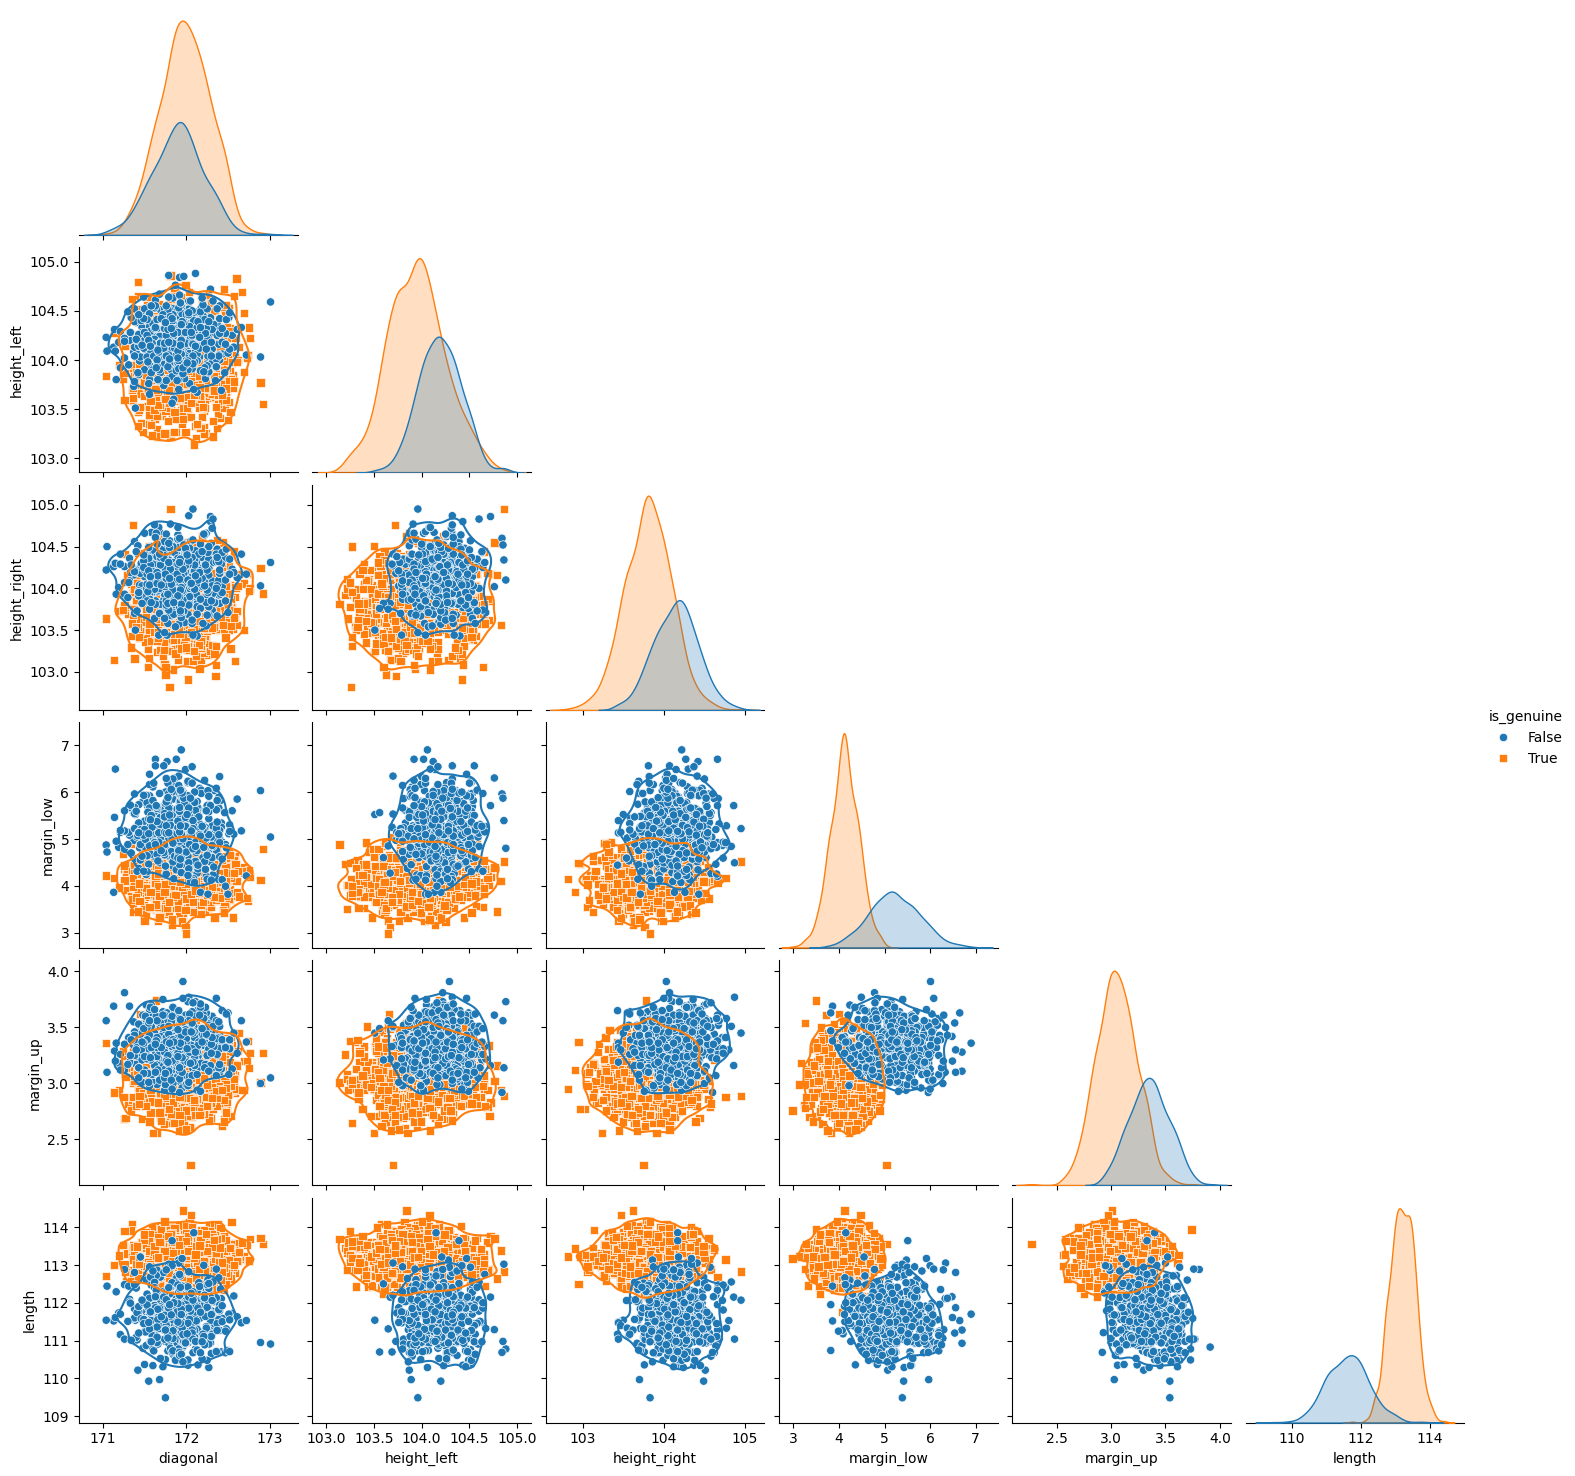

In [17]:
# Pairplot permet de voir les corrélations par paires entre chaque variables quantitatives pour la variable qualitative 'is_genuine'
g = sns.pairplot(df_billets_with_linear_regression, hue = 'is_genuine', markers = ['o', 's'], corner = True)
g.map_lower(sns.kdeplot, levels = 2, color='.2')
plt.show()

In [18]:
# On remarque que la longueur des vrais billets est supérieure aux faux mais la marge basse est plus courte

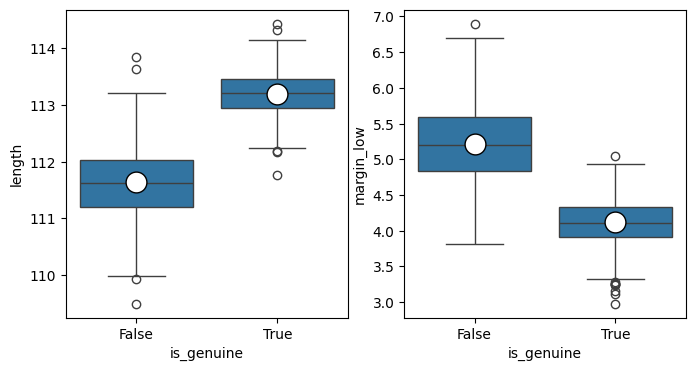

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
mp = {"marker":"o","markerfacecolor":"white", "markeredgecolor":"black", "markersize":"15"}
sns.boxplot(data=df_billets_with_linear_regression, y = 'length', x = 'is_genuine', showmeans=True, meanprops = mp, ax = ax[0])
sns.boxplot(data=df_billets_with_linear_regression, y = 'margin_low', x = 'is_genuine', showmeans=True, meanprops = mp, ax = ax[1])
plt.show()

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 5 - Méthode K-Means</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">5.1 - Méthode du coude</h3>
</div>

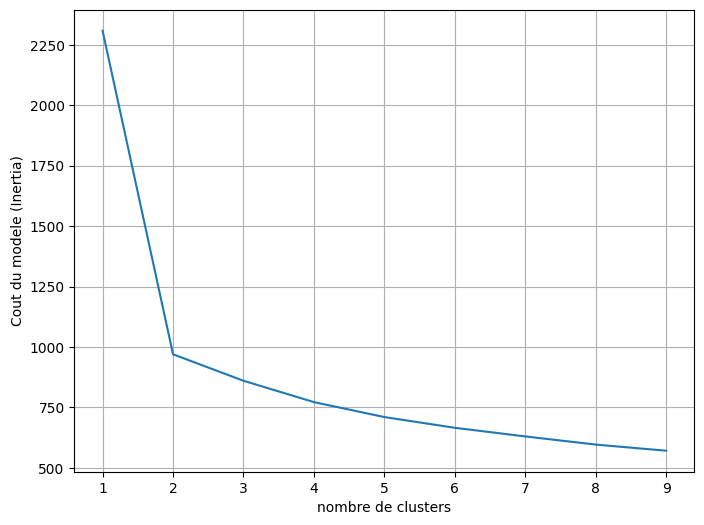

In [20]:
X = df_billets_with_linear_regression.drop(['is_genuine'], axis=1)
inertia = []
k_range=range(1, 10)
for k in k_range:
    model=sk.cluster.KMeans(n_clusters=k, n_init=10).fit(X)
    inertia.append(model.inertia_)
    
plt.figure(figsize=(8, 6))
plt.plot(k_range,inertia )
plt.xlabel('nombre de clusters')
plt.ylabel('Cout du modele (Inertia)')
plt.grid()
plt.show()

In [21]:
# La méthode du coude nous permet d'observer que le nombre de clusters optimal est 2

In [22]:
kmeans = sk.cluster.KMeans(n_clusters=2, n_init=10, random_state=42).fit(X)
df_billets_with_linear_regression['cluster'] = kmeans.predict(X)
# On inverse le cluster 0 et 1 pour être en phase avec 'is_genuine'
df_billets_with_linear_regression['cluster'] = np.logical_xor(df_billets_with_linear_regression['cluster'], 1).astype(int)

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">5.2 - Matrice de confusion</h3>
</div>

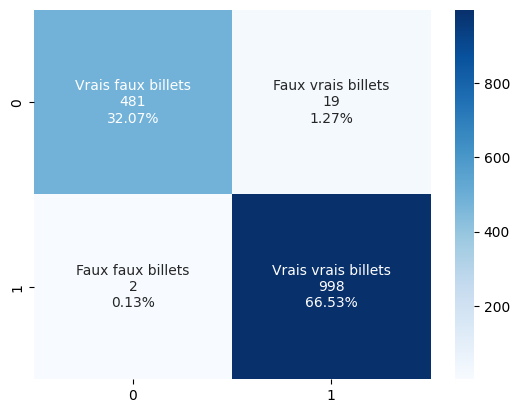

In [23]:
# Matrice de confusion
matrice_confusion = confusion_matrix(y_true = df_billets_with_linear_regression['is_genuine'], y_pred = df_billets_with_linear_regression['cluster'])
group_names = ['Vrais faux billets', 'Faux vrais billets', 'Faux faux billets', 'Vrais vrais billets']
group_counts = ['{0:0.0f}'.format(value) for value in matrice_confusion.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in matrice_confusion.flatten()/np.sum(matrice_confusion)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(matrice_confusion, annot = labels, fmt = '', cmap = 'Blues')
plt.show()

In [24]:
# Calcul de la métrique Accuracy de la matrice de confusion
print("La métrique Accuracy de la matrice de confusion est de:", (matrice_confusion[0][0]+matrice_confusion[1][1])*100/(matrice_confusion[0][1]+matrice_confusion[1][0]+matrice_confusion[0][0]+matrice_confusion[1][1]))

La métrique Accuracy de la matrice de confusion est de: 98.6


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 6 - Régression logistique</h2>
</div>

In [25]:
X = df_billets_with_linear_regression.drop(['is_genuine', 'cluster'], axis=1)
y = df_billets_with_linear_regression['is_genuine']
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
clf = sk.linear_model.LogisticRegression(random_state=42).fit(X_train, y_train)

In [27]:
df_billets_with_linear_regression['logistic_regression'] = clf.predict(X)
logistic_regression = clf.predict(X_test)

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">6.1 - Matrice de confusion</h3>
</div>

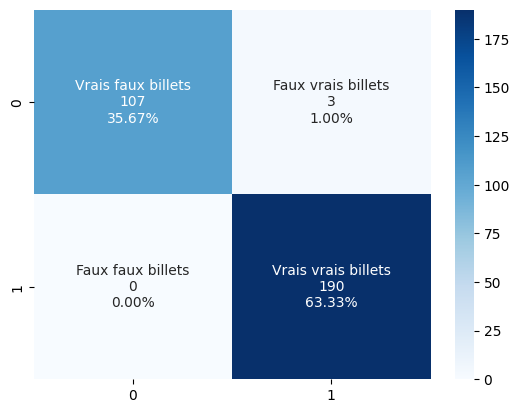

In [28]:
matrice_confusion = confusion_matrix(y_true = y_test, y_pred = logistic_regression)
group_names = ['Vrais faux billets', 'Faux vrais billets', 'Faux faux billets', 'Vrais vrais billets']
group_counts = ['{0:0.0f}'.format(value) for value in matrice_confusion.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in matrice_confusion.flatten()/np.sum(matrice_confusion)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(matrice_confusion, annot = labels, fmt = '', cmap = 'Blues')
plt.show()

In [29]:
# Calcul de la métrique Accuracy de la matrice de confusion
print("La métrique Accuracy de la matrice de confusion est de:", (matrice_confusion[0][0]+matrice_confusion[1][1])*100/(matrice_confusion[0][1]+matrice_confusion[1][0]+matrice_confusion[0][0]+matrice_confusion[1][1]))

La métrique Accuracy de la matrice de confusion est de: 99.0


In [30]:
# La régression logistique réalisé sur l'échantillon de test offre de meilleur résultat que la méthode K-Means pour les vrais et faux billets
# La métrique Accuracy est naturellement plus élevée
# On choisira donc cette méthode pour la détection des faux billets

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 7 - Analyse de la composante principale</h2>
</div>

In [31]:
X = df_billets_with_linear_regression.drop(['is_genuine', 'cluster', 'logistic_regression'], axis=1)
std_scale = sk.preprocessing.StandardScaler().fit(X)
X_std = pd.DataFrame(std_scale.transform(X), columns=X.columns)

In [32]:
n_components = 2
pca = PCA(n_components=n_components).fit(X_std)
print('Variance expliquée :', round(sum(pca.explained_variance_ratio_) * 100, 1), '%', '\nVariance par composante :', pca.explained_variance_ratio_)

Variance expliquée : 60.2 % 
Variance par composante : [0.43204935 0.16957137]


In [33]:
pca = PCA(n_components = n_components)
reduced = pca.fit_transform(X_std)

for i in range(0, n_components): 
    df_billets_with_linear_regression['PC' + str(i + 1)] = reduced[:, i]

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">7.1 - Projection des individus par authenticité</h3>
</div>

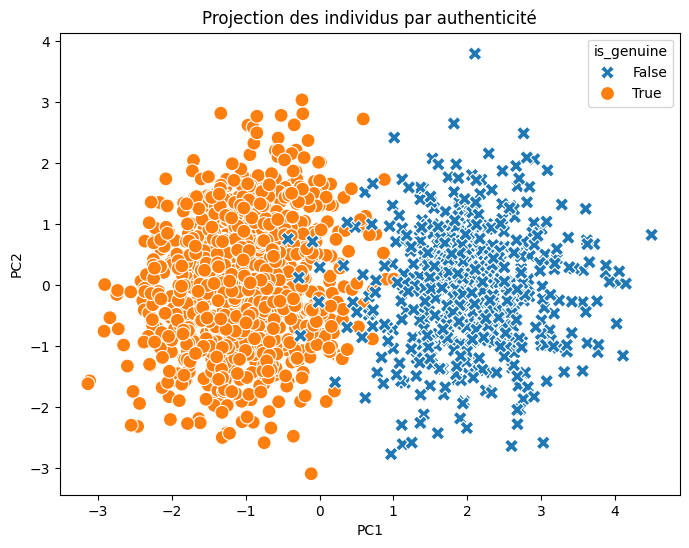

In [34]:
plt.figure(figsize=(8, 6))
scatter_markers = ['X', 'o']
sns.scatterplot(data = df_billets_with_linear_regression, x = 'PC1', y = 'PC2', style = 'is_genuine', hue = 'is_genuine', markers = scatter_markers, s = 100)
plt.title('Projection des individus par authenticité')
plt.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">7.2 - Projection des individus par régression logistique</h3>
</div>

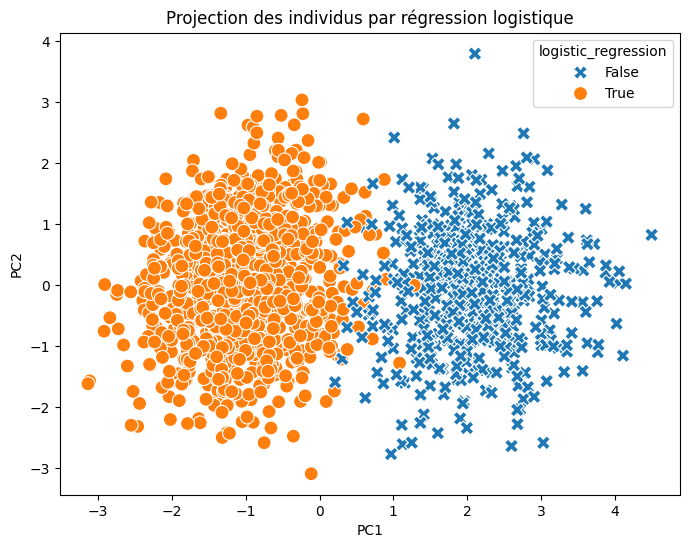

In [35]:
plt.figure(figsize=(8, 6))
scatter_markers = ['X', 'o']
sns.scatterplot(data = df_billets_with_linear_regression, x = 'PC1', y = 'PC2', style = 'logistic_regression', hue = 'logistic_regression', markers = scatter_markers, s = 100)
plt.title('Projection des individus par régression logistique')
plt.show()

In [36]:
# La régression logistique produit un excellent résultat comme le confirme les graphiques de projection ci-dessus
# Seuls 14 billets ont été mal détectés

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">7.3 - Cercle des corrélations</h3>
</div>

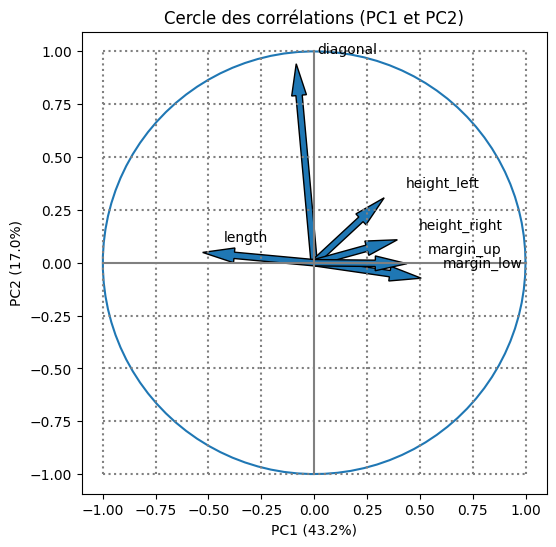

In [37]:
(fig, ax) = plt.subplots(figsize=(6, 6))
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0, 0, pca.components_[0, i], pca.components_[1, i], head_width=.07, head_length=.15, width=.03, length_includes_head=True)
    plt.text(pca.components_[0, i] + .1, pca.components_[1, i] + .05, X_std.columns.values[i])

an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))
plt.plot([-1, 1], [0, 0], color='grey', ls='-')
plt.plot([0, 0], [-1, 1], color='grey', ls='-')
for i in np.arange(-1, 1.25, 0.25):
    if i != 0:
        plt.plot([-1, 1], [i, i], color='grey', ls=':')
        plt.plot([i, i], [-1, 1], color='grey', ls=':')

plt.axis('equal')
plt.xlabel('PC{} ({}%)'.format(0+1, round(100*pca.explained_variance_ratio_[0],1)))
plt.ylabel('PC{} ({}%)'.format(1+1, round(100*pca.explained_variance_ratio_[1],1)))
ax.set_title('Cercle des corrélations (PC1 et PC2)')
plt.show()

In [38]:
training_dict = {}
training_dict[0] = std_scale
training_dict[1] = clf
training_dict[2] = pca

In [39]:
pickle.dump(training_dict, open('training_model.pkl', 'wb'))